# Penguins
This notebook is my attempt to analyze penguins dataset.

In [ ]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import scipy.stats

### Loading

In [ ]:
#Loading the Penguins dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Cleaning dataset

In [6]:
# Checking missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# Removing missing values
df.dropna(axis=0, inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# Checking multiple values
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 333, dtype: bool

No duplicate values. Now, I will work with dateset with only 333 rows.

In [10]:
# Correcting index
df.reset_index(drop=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Describing dataset

In [50]:
count1=df['species'].value_counts()
count2=df['island'].value_counts()
count3=df['sex'].value_counts()
print(count1,count2,count3)


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64 island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


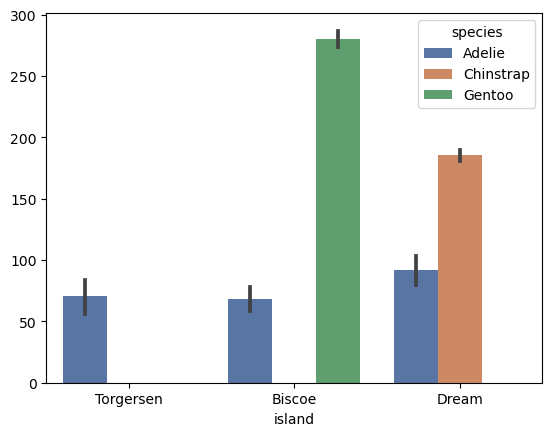

In [51]:
with sns.color_palette('deep'):
    sns.barplot(data=df, x='island', y=df.index, hue='species')

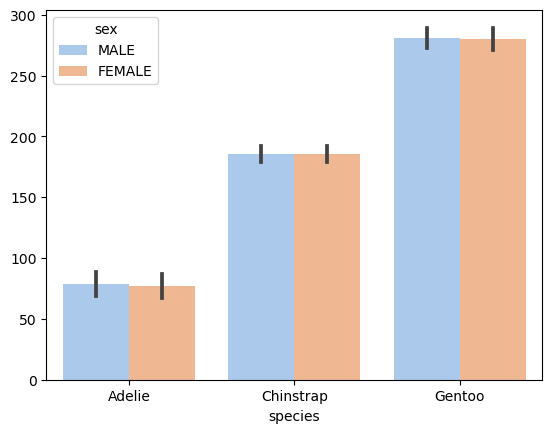

In [52]:
with sns.color_palette('pastel'):
    sns.barplot(data=df, x='species', y=df.species.index, hue='sex')

This dataset is not balanced, containing various counts of values for variables as it came from field ecological research.

##### Histograms of morphological values

A histogram is a visualization tool that represents the distribution of one or more variables by counting the number of observations which fall within discrete bins. Parameter kde=, if True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).
(https://seaborn.pydata.org/generated/seaborn.histplot.html)

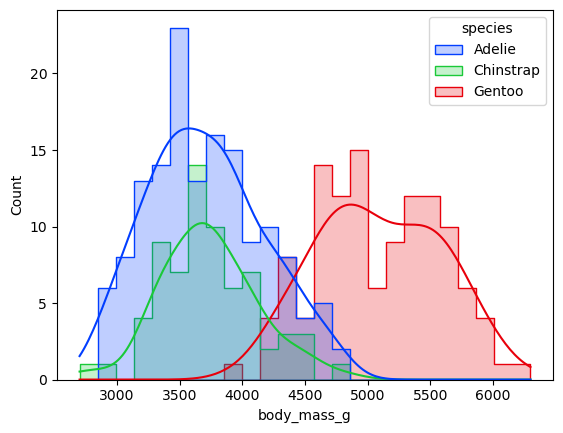

In [53]:
with sns.color_palette('bright6'):
    sns.histplot(data=df, x='body_mass_g', hue='species', element='step', kde=True, bins=25, )

Gentoo penguins are heavier than Adelie penguins and Chinstrap penguins.

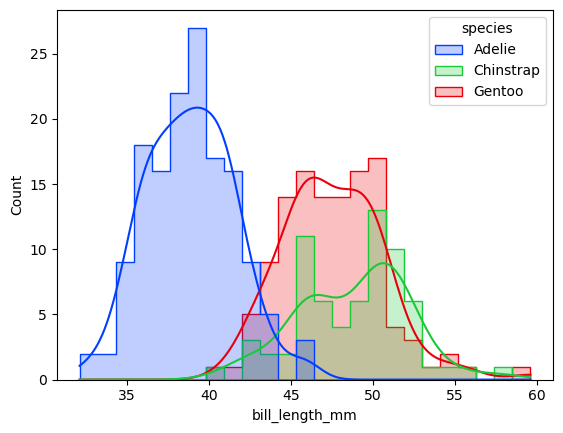

In [16]:
with sns.color_palette('bright6'):
    sns.histplot(data=df, x='bill_length_mm', hue='species', element='step', kde=True, bins=25)

Adelie penguins have shorter bills than Chinstrap penguins and Gentoo penguins.

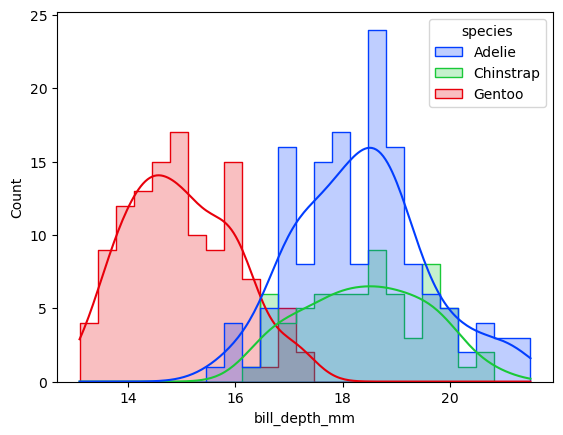

In [17]:
with sns.color_palette('bright6'):
    sns.histplot(data=df, x='bill_depth_mm', hue='species', element='step', kde=True, bins=25)

Bill depth is lower with Gentoo penguins than with Adelie penguins and Chinstrap penguins.

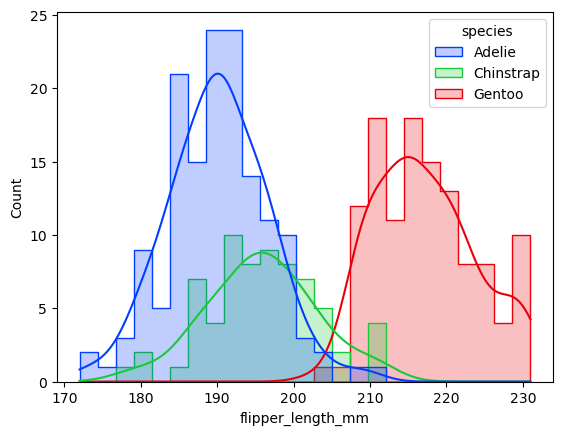

In [18]:
with sns.color_palette('bright6'):
    sns.histplot(data=df, x='flipper_length_mm', hue='species', element='step',kde=True, bins=25)

Gentoo penguins have longer flipper than Adelie penguins and Chinstrap penguins.

### Correlation

 Correlation or dependence, is a relationship between variables. It could be positive - with one variable increasing, the other one increasing, too - or negative - with one variable increasing, the other one decreasing. 
I am going to make a comparison of flipper_length_mm and body_mass_g. The flipper is a big limb on the penguin's body. I assume a positive correlation between the length of the flipper and the weight of the body of the whole penguin. This can be proved by the model of linear regression (https://realpython.com/linear-regression-in-python/#simple-linear-regression).

##### Linear Regression Model

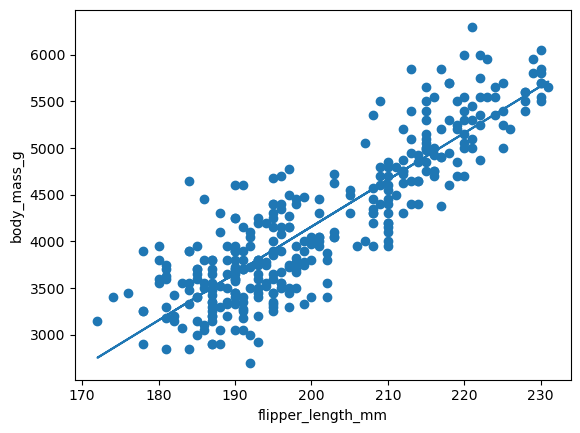

In [73]:
import matplotlib.pyplot as plt
from scipy import stats

x = df['flipper_length_mm']
y = df['body_mass_g']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def reg(x):
  return slope * x + intercept

model = list(map(reg, x))

plt.scatter(x,y)
plt.plot(x, model)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.show()

 Solid, positive correlation as fit line and distribution of values are oriented to the diagonal of the graph.

Counting of correlation coefficient's values for whole dataset can show another possible relationships between values.

##### Encoding

Change of datatypes into int64 can help me to count the correlation of all variables. (https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

In [11]:
# Encoding
encode=LabelEncoder()
df.species=encode.fit_transform(df.species)
df.island=encode.fit_transform(df.island)
df.sex=encode.fit_transform(df.sex)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 16.9 KB


In [12]:
df.astype('int64').dtypes

species              int64
island               int64
bill_length_mm       int64
bill_depth_mm        int64
flipper_length_mm    int64
body_mass_g          int64
sex                  int64
dtype: object

  Adelie has code 0, Chinstrap 1, Gentoo 2, male 0, female 1, island Torgensen 2, Dream island 1, Biscoe 0. The datatype was changed from object to integer. This unification can help me to analyze the whole dataset as some methods of statistics work with numbers mainly. Optimal datatype for model variables in this dataset is a number - integer64 as morphological values measured in mm and grams will stay precise.

##### Correlation Matrix

The default value of the parameter method of corr() function is 'pearson' - which means Pearson correlation coefficient. 
(https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). 

<Axes: >

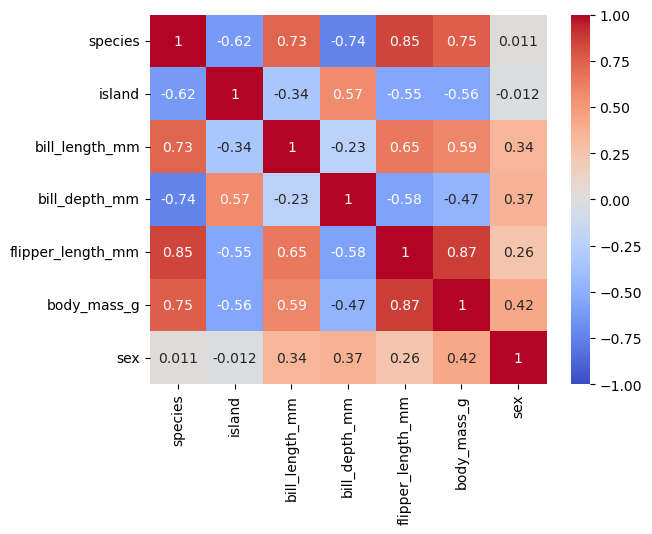

In [13]:
corr_coef=df.corr(method='pearson')
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', vmin=-1,vmax=1)

Results between -0.59 and 0.59 indicate an omissible correlation. Variable island and sex shows only a weak correlation. Some correlation is between flipper_lenght_mm and bill_lenght_mm and between flipper_lenght_mm and bodymass_g. Species is a variable with correlation to any other variable which is not a surprise. Surprise is a weak correlation between sex and morphological values which is a misrepresentation given by containing values for males and females of three species in the same categories.

***
### End

![Adelie](https://upload.wikimedia.org/wikipedia/commons/a/a9/Adelie_Penguin2.jpg)